In [1]:
from skimage.data import imread
from skimage.io import imshow,imsave
from skimage import img_as_float
import pandas as pd
import numpy as np
import cv2
from skimage.util import crop
from skimage.transform import rotate
from skimage.transform import resize
import matplotlib.pyplot as plt
%matplotlib inline
import math
import json
import random
#conda install --channel https://conda.anaconda.org/menpo opencv3

In [ ]:
def deg_angle_between(x1,y1,x2,y2):
    from math import atan2, degrees, pi
    dx = x2 - x1
    dy = y2 - y1
    rads = atan2(-dy,dx)
    rads %= 2*pi
    degs = degrees(rads)
    return(degs)

In [ ]:
def get_rotated_cropped_fish(img,x1,y1,x2,y2):
    (h,w) = img.shape[:2]
    #calculate center and angle
    center = ( (x1+x2) / 2,(y1+y2) / 2)
    angle = np.floor(-deg_angle_between(x1,y1,x2,y2))
    #print('angle=' +str(angle) + ' ')
    #print('center=' +str(center))
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    
    fish_length = np.sqrt((x1-x2)**2+(y1-y2)**2)
    cropped = rotated[(max((center[1]-fish_length/1.8),0)):(max((center[1]+fish_length/1.8),0)) ,
                      (max((center[0]- fish_length/1.8),0)):(max((center[0]+fish_length/1.8),0))]
    #imshow(img)
    #imshow(rotated)
    #imshow(cropped)
    resized = resize(cropped,(224,224))
    return(resized)

In [ ]:
label_files = ['bet_labels.json','alb_labels.json','yft_labels.json','dol_labels.json','shark_labels.json','lag_labels.json','other_labels.json']

data_dirs = ['/Users/yu/code/git/kaggle/input/train/BET/',
             '/Users/yu/code/git/kaggle/input/train/ALB/',
             '/Users/yu/code/git/kaggle/input/train/YFT/',
             '/Users/yu/code/git/kaggle/input/train/DOL/',
             '/Users/yu/code/git/kaggle/input/train/SHARK/',
             '/Users/yu/code/git/kaggle/input/train/LAG/',
             '/Users/yu/code/git/kaggle/input/train/OTHER/']


In [ ]:
images = list()
labels_list = list()
for c in range(7):
    labels = pd.read_json(label_files[c])
    for i in range(len(labels)):
        try:
            img_filename = labels.iloc[i,2]
            print(img_filename)
            l1 = pd.DataFrame((labels[labels.filename==img_filename].annotations).iloc[0])
            image = imread(data_dirs[c]+img_filename)
            images.append(get_rotated_cropped_fish(image,np.floor(l1.iloc[0,1]),np.floor(l1.iloc[0,2]),np.floor(l1.iloc[1,1]),np.floor(l1.iloc[1,2])))
            print('success')
            labels_list.append(c)
        except:
            pass

In [ ]:
pd.DataFrame(labels_list).iloc[:,0].value_counts()

In [ ]:
pd.DataFrame(labels_list).iloc[:,0].value_counts()

In [ ]:
image

In [ ]:
for i in range(len(images)):
    imsave('../preprocessed_train/img_'+str(i)+'label_'+str(labels_list[i])+'.jpg',images[i])

In [ ]:
import json

In [ ]:
filename = label_json[1]["filename"]

In [ ]:
label_file = label_files[0]
with open(label_file, 'r') as f:
    label_json = json.load(f)

for index in random.sample(range(100), 10):
    lt, rb = label_json[index]["annotations"]
    lt_x, lt_y = lt["x"], lt["y"]
    rb_x, rb_y = rb["x"], rb["y"]
    filename = label_json[index]["filename"]
    file_path = data_dirs[0] + filename
    img = imread(file_path)
    cv2.rectangle(img, (int(lt_x), int(lt_y)), (int(rb_x), int(rb_y)), 254, 2)
    plt.figure()
    plt.imshow(img)

In [2]:
label_files = ['./label/bet_labels.json',
                 './label/alb_labels.json',
                 './label/yft_labels.json',
                 './label/dol_labels.json',
                 './label/shark_labels.json',
                 './label/lag_labels.json',
                 './label/other_labels.json']
data_dirs = ['./input/train/BET/',
             './input/train/ALB/',
             './input/train/YFT/',
             './input/train/DOL/',
             './input/train/SHARK/',
             './input/train/LAG/',
             './input/train/OTHER/']

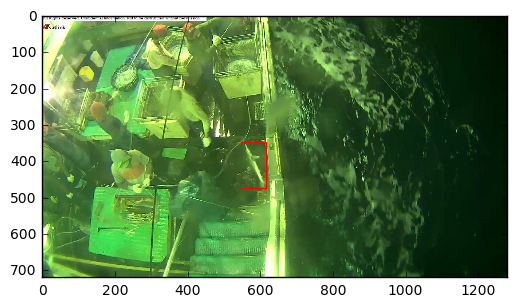

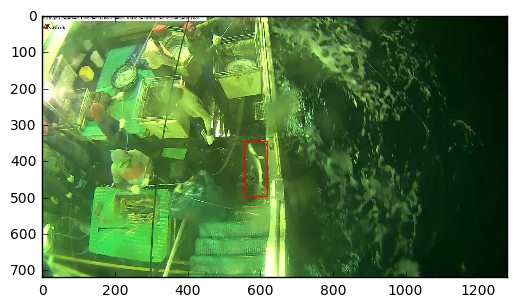

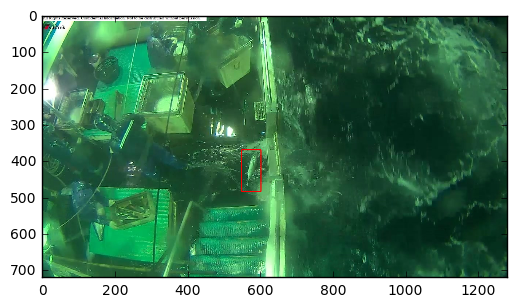

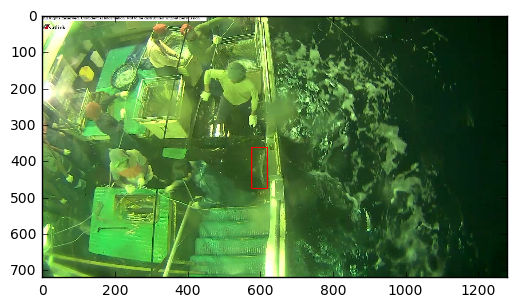

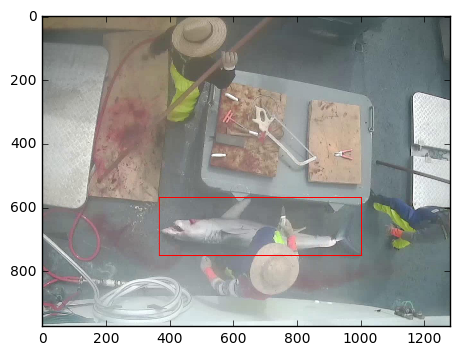

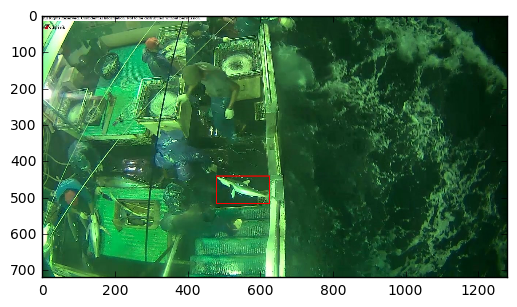

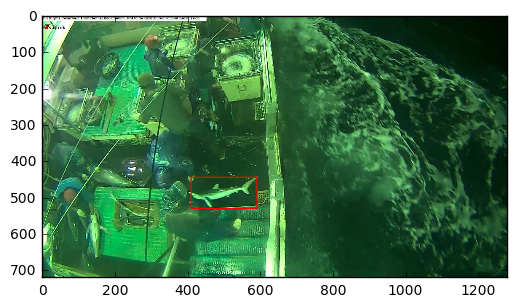

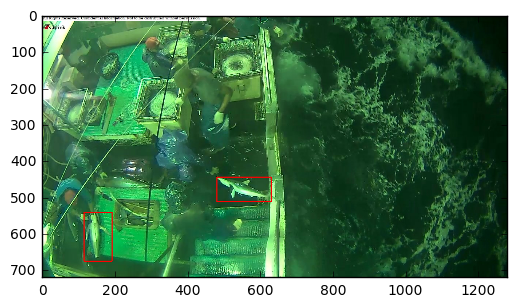

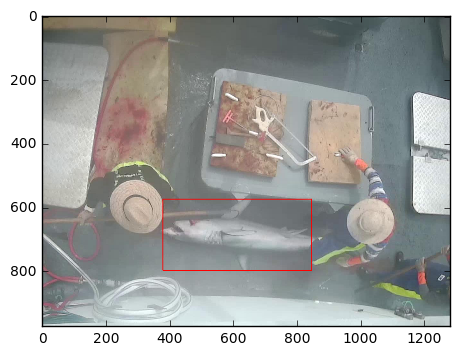

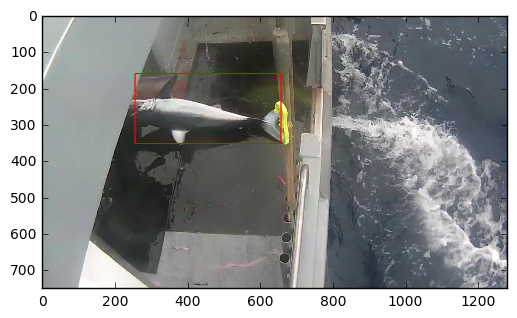

In [3]:
ind = 4
label_file = label_files[ind]
with open(label_file, 'r') as f:
    label_json = json.load(f)

for index in random.sample(range(len(label_json)), 10):
    rect_lst = label_json[index]["annotations"]
    filename = label_json[index]["filename"]
    file_path = data_dirs[ind] + filename.split("/")[-1]
    img = imread(file_path)
    for rect in rect_lst:
        x1, y1 = int(rect['x']), int(rect['y'])
        x2, y2 = x1+int(rect['width']), y1+int(rect['height'])
        cv2.rectangle(img, (x1, y1), (x2, y2), 255, 2)
    plt.figure()
    plt.imshow(img)

In [ ]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

"""Simple image classification with Inception.

Run image classification with Inception trained on ImageNet 2012 Challenge data
set.

This program creates a graph from a saved GraphDef protocol buffer,
and runs inference on an input JPEG image. It outputs human readable
strings of the top 5 predictions along with their probabilities.

Change the --image_file argument to any jpg image to compute a
classification of that image.

Please see the tutorial and website for a detailed description of how
to use this script to perform image recognition.

https://tensorflow.org/tutorials/image_recognition/
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os.path
import re
import sys
import tarfile

import numpy as np
from six.moves import urllib
import tensorflow as tf

FLAGS = None

# pylint: disable=line-too-long
DATA_URL = 'http://download.tensorflow.org/models/image/imagenet/inception-2015-12-05.tgz'
# pylint: enable=line-too-long


class NodeLookup(object):
  """Converts integer node ID's to human readable labels."""

  def __init__(self,
               label_lookup_path=None,
               uid_lookup_path=None):
    if not label_lookup_path:
      label_lookup_path = os.path.join(
          FLAGS.model_dir, 'imagenet_2012_challenge_label_map_proto.pbtxt')
    if not uid_lookup_path:
      uid_lookup_path = os.path.join(
          FLAGS.model_dir, 'imagenet_synset_to_human_label_map.txt')
    self.node_lookup = self.load(label_lookup_path, uid_lookup_path)

  def load(self, label_lookup_path, uid_lookup_path):
    """Loads a human readable English name for each softmax node.

    Args:
      label_lookup_path: string UID to integer node ID.
      uid_lookup_path: string UID to human-readable string.

    Returns:
      dict from integer node ID to human-readable string.
    """
    if not tf.gfile.Exists(uid_lookup_path):
      tf.logging.fatal('File does not exist %s', uid_lookup_path)
    if not tf.gfile.Exists(label_lookup_path):
      tf.logging.fatal('File does not exist %s', label_lookup_path)

    # Loads mapping from string UID to human-readable string
    proto_as_ascii_lines = tf.gfile.GFile(uid_lookup_path).readlines()
    uid_to_human = {}
    p = re.compile(r'[n\d]*[ \S,]*')
    for line in proto_as_ascii_lines:
      parsed_items = p.findall(line)
      uid = parsed_items[0]
      human_string = parsed_items[2]
      uid_to_human[uid] = human_string

    # Loads mapping from string UID to integer node ID.
    node_id_to_uid = {}
    proto_as_ascii = tf.gfile.GFile(label_lookup_path).readlines()
    for line in proto_as_ascii:
      if line.startswith('  target_class:'):
        target_class = int(line.split(': ')[1])
      if line.startswith('  target_class_string:'):
        target_class_string = line.split(': ')[1]
        node_id_to_uid[target_class] = target_class_string[1:-2]

    # Loads the final mapping of integer node ID to human-readable string
    node_id_to_name = {}
    for key, val in node_id_to_uid.items():
      if val not in uid_to_human:
        tf.logging.fatal('Failed to locate: %s', val)
      name = uid_to_human[val]
      node_id_to_name[key] = name

    return node_id_to_name

  def id_to_string(self, node_id):
    if node_id not in self.node_lookup:
      return ''
    return self.node_lookup[node_id]


def create_graph():
  """Creates a graph from saved GraphDef file and returns a saver."""
  # Creates graph from saved graph_def.pb.
  with tf.gfile.FastGFile(os.path.join(
      FLAGS.model_dir, 'classify_image_graph_def.pb'), 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')


def run_inference_on_image(image):
  """Runs inference on an image.

  Args:
    image: Image file name.

  Returns:
    Nothing
  """
  if not tf.gfile.Exists(image):
    tf.logging.fatal('File does not exist %s', image)
  image_data = tf.gfile.FastGFile(image, 'rb').read()

  # Creates graph from saved GraphDef.
  create_graph()

  with tf.Session() as sess:
    # Some useful tensors:
    # 'softmax:0': A tensor containing the normalized prediction across
    #   1000 labels.
    # 'pool_3:0': A tensor containing the next-to-last layer containing 2048
    #   float description of the image.
    # 'DecodeJpeg/contents:0': A tensor containing a string providing JPEG
    #   encoding of the image.
    # Runs the softmax tensor by feeding the image_data as input to the graph.
    softmax_tensor = sess.graph.get_tensor_by_name('softmax:0')
    predictions = sess.run(softmax_tensor,
                           {'DecodeJpeg/contents:0': image_data})
    predictions = np.squeeze(predictions)

    # Creates node ID --> English string lookup.
    node_lookup = NodeLookup()

    top_k = predictions.argsort()[-FLAGS.num_top_predictions:][::-1]
    for node_id in top_k:
      human_string = node_lookup.id_to_string(node_id)
      score = predictions[node_id]
      print('%s (score = %.5f)' % (human_string, score))


def maybe_download_and_extract():
  """Download and extract model tar file."""
  dest_directory = FLAGS.model_dir
  if not os.path.exists(dest_directory):
    os.makedirs(dest_directory)
  filename = DATA_URL.split('/')[-1]
  filepath = os.path.join(dest_directory, filename)
  if not os.path.exists(filepath):
    def _progress(count, block_size, total_size):
      sys.stdout.write('\r>> Downloading %s %.1f%%' % (
          filename, float(count * block_size) / float(total_size) * 100.0))
      sys.stdout.flush()
    filepath, _ = urllib.request.urlretrieve(DATA_URL, filepath, _progress)
    print()
    statinfo = os.stat(filepath)
    print('Succesfully downloaded', filename, statinfo.st_size, 'bytes.')
  tarfile.open(filepath, 'r:gz').extractall(dest_directory)


def main(_):
  maybe_download_and_extract()
  image = (FLAGS.image_file if FLAGS.image_file else
           os.path.join(FLAGS.model_dir, 'cropped_panda.jpg'))


  run_inference_on_image(image)


if __name__ == '__main__':
  parser = argparse.ArgumentParser()
  # classify_image_graph_def.pb:
  #   Binary representation of the GraphDef protocol buffer.
  # imagenet_synset_to_human_label_map.txt:
  #   Map from synset ID to a human readable string.
  # imagenet_2012_challenge_label_map_proto.pbtxt:
  #   Text representation of a protocol buffer mapping a label to synset ID.
  parser.add_argument(
      '--model_dir',
      type=str,
      default='/tmp/imagenet',
      help="""\
      Path to classify_image_graph_def.pb,
      imagenet_synset_to_human_label_map.txt, and
      imagenet_2012_challenge_label_map_proto.pbtxt.\
      """
  )
  parser.add_argument(
      '--image_file',
      type=str,
      default='',
      help='Absolute path to image file.'
  )
  parser.add_argument(
      '--num_top_predictions',
      type=int,
      default=5,
      help='Display this many predictions.'
  )
  FLAGS, unparsed = parser.parse_known_args()
  tf.app.run(main=main, argv=[sys.argv[0]] + unparsed)


CRITICAL:tensorflow:File does not exist /tmp/imagenet\img_00003.jpg


In [12]:
import tensorflow as tf

NameError: name 'softmax_tensor' is not defined